In [1]:
%load_ext rpy2.ipython

In [5]:
import pandas as pd
import numpy as np
import scipy

dataset='../data/all_datasets/AD_HS_00001.cell_exp.txt'
rmsk='../../universal_data/rmsk/rmsk_GRCh38.txt'
dataset_umap='../data/all_datasets/AD_HS_00001.cell_umap.txt'
gtf='../../universal_data/ref/GRCh38/gencode.v43.basic.annotation.gtf'
protein_coding=[]
for line in open(gtf,'r'):
    if not line.startswith('#'):
        info=line.strip().split('\t')
        if info[2]=='gene' and 'protein_coding' in info[-1]:
            protein_coding.append(info[-1].split('gene_name ')[1].split(';')[0].replace('"',''))

cell_umap=pd.read_csv(dataset_umap,sep='\t',index_col=0)
cell_exp_org=pd.read_csv(dataset,sep='\t',index_col=0)
te_table=pd.read_csv(rmsk,sep='\t')
rte=list(set(te_table.loc[te_table['repClass'].isin(['LINE','SINE','LTR']),['repName','repClass','repFamily']].drop_duplicates()['repName'].tolist()))
rte_rep=[x.replace('_','.').replace('-','.') for x in rte]
colnames=cell_exp_org.columns.tolist()
repl_colnames=[]
for x in colnames:
    if '.' not in x or x not in rte_rep:
        repl_colnames.append(x)
    else:
        repl_colnames.append(rte[rte_rep.index(x)])
cell_exp_org.columns=repl_colnames



In [5]:
cell_exp=cell_exp_org.copy()
l1s=te_table.loc[te_table['repClass'].isin(['LINE','SINE','LTR']),['repName','repClass','repFamily']]
l1s=list(set(l1s.loc[l1s['repFamily']=='ERV1','repName'].tolist()))

cell_exp=np.expm1(cell_exp)
cell_exp['L1s']=cell_exp[[x for x in l1s if x in cell_exp.columns]].sum(axis=1)
# cell_exp=np.log1p(cell_exp)

In [6]:
for cell in set(cell_umap['predicted.celltype'].tolist()):
    print('+++++++++++++++++++++++++'+cell+'+++++++++++++++++++++++++')

    ctrl_cells=cell_umap.loc[(cell_umap['Diagnosis']=='Control') & (cell_umap['predicted.celltype']==cell),:].index.tolist()
    cell_exp_ctrl=cell_exp.loc[ctrl_cells,:]
    ctrl_des=cell_exp_ctrl['L1s'].describe()
    print(ctrl_des)
    pd_cells=cell_umap.loc[(cell_umap['Diagnosis']!='Control') & (cell_umap['predicted.celltype']==cell),:].index.tolist()
    cell_exp_pd=cell_exp.loc[pd_cells,:]
    disease_des=cell_exp_pd['L1s'].describe()
    print(disease_des)
    print(disease_des['mean']/ctrl_des['mean'])


+++++++++++++++++++++++++Ex+++++++++++++++++++++++++
count    8334.000000
mean       81.917611
std        41.716044
min         0.000000
25%        51.914349
50%        77.386071
75%       107.605883
max       264.410365
Name: L1s, dtype: float64
count    8363.000000
mean       78.265980
std        41.209494
min         0.000000
25%        47.923323
50%        73.529412
75%       103.380220
max       258.810573
Name: L1s, dtype: float64
0.9554231245561801
+++++++++++++++++++++++++In+++++++++++++++++++++++++
count    456.000000
mean     100.714514
std       39.149716
min        6.983240
25%       73.971341
50%       97.913543
75%      126.216996
max      248.447205
Name: L1s, dtype: float64
count    255.000000
mean     105.235593
std       40.884113
min        9.372071
25%       76.784384
50%      103.585657
75%      129.796135
max      228.969637
Name: L1s, dtype: float64
1.044890041784934
+++++++++++++++++++++++++Oli+++++++++++++++++++++++++
count    7110.000000
mean      109.466072
s

In [28]:
for cell in set(cell_umap['predicted.celltype'].tolist()):
    print('+++++++++++++++++++++++++'+cell+'+++++++++++++++++++++++++')
    ctrl_cells=cell_umap.loc[(cell_umap['Diagnosis']=='Control') & (cell_umap['predicted.celltype']==cell),:].index.tolist()
    cell_exp_ctrl=cell_exp.loc[ctrl_cells,:]
    ctrl_des=cell_exp_ctrl['L1s'].describe()
    print(ctrl_des)
    pd_cells=cell_umap.loc[(cell_umap['Diagnosis']!='Control') & (cell_umap['predicted.celltype']==cell),:].index.tolist()
    cell_exp_pd=cell_exp.loc[pd_cells,:]
    disease_des=cell_exp_pd['L1s'].describe()
    print(disease_des)
    print(disease_des['mean']/ctrl_des['mean'])

count    2877.000000
mean        7.168810
std         0.222923
min         4.506826
25%         7.040124
50%         7.179064
75%         7.309722
max         7.786578
Name: L1s, dtype: float64


In [19]:
set(cell_umap['Diagnosis'])

{'AD', 'Control'}

## compare EC to SFG

In [31]:
import pandas as pd
import numpy as np

sfg_exp=pd.read_csv('../data/all_datasets/AD_HS_00003.1.cell_exp.txt',sep='\t',index_col=0)
sfg_umap=pd.read_csv('../data/all_datasets/AD_HS_00003.1.cell_umap.txt',sep='\t',index_col=0)
ec_exp=pd.read_csv('../data/all_datasets/AD_HS_00003.2.cell_exp.txt',sep='\t',index_col=0)
ec_umap=pd.read_csv('../data/all_datasets/AD_HS_00003.2.cell_umap.txt',sep='\t',index_col=0)
rmsk='../../universal_data/rmsk/rmsk_GRCh38.txt'

te_table=pd.read_csv(rmsk,sep='\t')
rte=list(set(te_table.loc[te_table['repClass'].isin(['LINE','SINE','LTR']),['repName','repClass','repFamily']].drop_duplicates()['repName'].tolist()))
rte_rep=[x.replace('_','.').replace('-','.') for x in rte]


colnames=sfg_exp.columns.tolist()
repl_colnames=[]
for x in colnames:
    if '.' not in x or x not in rte_rep:
        repl_colnames.append(x)
    else:
        repl_colnames.append(rte[rte_rep.index(x)])
sfg_exp.columns=repl_colnames

colnames=ec_exp.columns.tolist()
repl_colnames=[]
for x in colnames:
    if '.' not in x or x not in rte_rep:
        repl_colnames.append(x)
    else:
        repl_colnames.append(rte[rte_rep.index(x)])
ec_exp.columns=repl_colnames

# sfg_umap['Diagnosis']=['Control' if x=='Stage_0' else 'AD' for x in sfg_umap['Diagnosis']]
# ec_umap['Diagnosis']=['Control' if x=='Stage_0' else 'AD' for x in ec_umap['Diagnosis']]
sfg_umap['Region']='SFG'
ec_umap['Region']='EC'
exp_org=pd.concat([sfg_exp,ec_exp],axis=0)
umap_org=pd.concat([sfg_umap,ec_umap],axis=0)

cell_exp=exp_org.copy()
cell_exp=np.expm1(cell_exp)
cell_umap=umap_org.copy()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in expm1
  result = func(self.values, **kwargs)


In [350]:
ervk=te_table.loc[te_table['repClass'].isin(['LINE','SINE','LTR']),['repName','repClass','repFamily']]
ervk=list(set(ervk.loc[ervk['repFamily']=='ERVK','repName'].tolist()))
ervk

['MER11B',
 'LTR13_',
 'MER11A',
 'HERVK3-int',
 'MER9B',
 'MER9a3',
 'MER11D',
 'LTR3',
 'LTR14A',
 'HERVK-int',
 'HERVK14-int',
 'LTR14',
 'LTR22B1',
 'LTR22A',
 'LTR3A',
 'LTR14C',
 'HERVK11D-int',
 'LTR22C',
 'MER9a2',
 'HERVK11-int',
 'HERVK14C-int',
 'LTR3B_v',
 'LTR5A',
 'HERVK13-int',
 'LTR13',
 'LTR3B_',
 'HERVK9-int',
 'MER9a1',
 'LTR13A',
 'LTR22B',
 'LTR22C0',
 'LTR3B',
 'MER11C',
 'LTR22',
 'LTR5_Hs',
 'LTR14B',
 'LTR5',
 'LTR22B2',
 'LTR22C2',
 'LTR22E',
 'HERVKC4-int',
 'HERVK22-int',
 'LTR13_v',
 'LTR5B']

In [34]:
l1s=te_table.loc[te_table['repClass'].isin(['LINE','SINE','LTR']),['repName','repClass','repFamily']]
l1s=list(set(l1s.loc[l1s['repFamily']=='L1','repName'].tolist()))
ervk=te_table.loc[te_table['repClass'].isin(['LINE','SINE','LTR']),['repName','repClass','repFamily']]
ervk=list(set(ervk.loc[ervk['repFamily']=='ERVK','repName'].tolist()))
Alus=te_table.loc[te_table['repClass'].isin(['LINE','SINE','LTR']),['repName','repClass','repFamily']]
Alus=list(set(Alus.loc[Alus['repFamily']=='Alu','repName'].tolist()))
AllTE=te_table.loc[te_table['repClass'].isin(['LINE','SINE','LTR']),['repName','repClass','repFamily']]
AllTE=list(set(AllTE['repName'].tolist()))
cell_exp['L1s']=cell_exp[[x for x in l1s if x in cell_exp.columns]].sum(axis=1)
cell_exp['ERVK']=cell_exp[[x for x in ervk if x in cell_exp.columns]].sum(axis=1)
cell_exp['Alus']=cell_exp[[x for x in Alus if x in cell_exp.columns]].sum(axis=1)
cell_exp['AllTE']=cell_exp[[x for x in AllTE if x in cell_exp.columns]].sum(axis=1)

In [165]:
result=[]
## te, cell, region, disease count, disease mean, ctrl count, ctrl mean, fc_mean
cell_list=list(set(cell_umap['predicted.celltype'].tolist()))
cell_list.append('All')
for te in ['L1s','ERVK','Alus','AllTE','AluYa5','AluYb8','HERV17-int','HERV9-int','HERVH48-int']:
    for cell in cell_list:
        for region in ['SFG','EC']:
            cell_filter=cell_umap['predicted.celltype']==cell
            region_filter=cell_umap['Region']==region
            if cell=='All':
                cell_filter=[True]*len(cell_filter)
            ctrl_cells=cell_umap.loc[((cell_umap['Diagnosis']=='Stage_0') & (cell_filter)) & (region_filter),:].index.tolist()
            cell_exp_ctrl=cell_exp.loc[ctrl_cells,:]
            ctrl_des=cell_exp_ctrl[te].describe()
            pd_cells=cell_umap.loc[((cell_umap['Diagnosis']=='Stage_6') & (cell_filter)) & (region_filter),:].index.tolist()
            cell_exp_pd=cell_exp.loc[pd_cells,:]
            disease_des=cell_exp_pd[te].describe()
            tmp=[te,cell,region,disease_des['count'],disease_des['mean'],ctrl_des['count'],ctrl_des['mean'],disease_des['mean']/ctrl_des['mean']]
            result.append(tmp)
    compare=pd.DataFrame(result,columns=['te', 'cell', 'region', 'disease_count', 'disease_mean', 'ctrl_count', 'ctrl_mean', 'fc_mean'])
    compare.to_csv('../data/analysis/regional_activation.txt',sep='\t',index=None)

/tmp/ipykernel_348985/2903432807.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  tmp=[te,cell,region,disease_des['count'],disease_des['mean'],ctrl_des['count'],ctrl_des['mean'],disease_des['mean']/ctrl_des['mean']]
/tmp/ipykernel_348985/2903432807.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  tmp=[te,cell,region,disease_des['count'],disease_des['mean'],ctrl_des['count'],ctrl_des['mean'],disease_des['mean']/ctrl_des['mean']]
/tmp/ipykernel_348985/2903432807.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  tmp=[te,cell,region,disease_des['count'],disease_des['mean'],ctrl_des['count'],ctrl_des['mean'],disease_des['mean']/ctrl_des['mean']]
/tmp/ipykernel_348985/2903432807.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  tmp=[te,cell,region,disease_des['count'],disease_des['mean'],ctrl_des['count'],ctrl_des['mean'],disease_des['mean']/ctrl_des['mean']]
/tmp/ipykernel_348985/2903432807.py:18: RuntimeWarni

In [64]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata

In [75]:
# cell_exp.fillna(value=0,inplace=True)
adata=anndata.AnnData(cell_exp.iloc[:,:-4])
adata.var_names=cell_exp.columns[:-4]
adata.obs_names=cell_exp.index
for x in cell_exp.columns[-4:]:
    adata.obs[x]=cell_exp[x]
adata.obs['Diagnosis']=cell_umap['Diagnosis']
adata.obs['Region']=cell_umap['Region']
adata.obs['CellType']=cell_umap['predicted.celltype']
adata.obsm['UMAP']=cell_umap[['UMAP_1','UMAP_2']]

adata.var["mito"] = adata.var_names.str.startswith("MT-")
adata.layers["counts"] = adata.X.copy()
sc.pp.calculate_qc_metrics(adata, qc_vars=["mito"], inplace=True)

In [158]:
sfg_umap=pd.read_csv('../data/all_datasets/AD_HS_00003.1.cell_umap.txt',sep='\t',index_col=0)
ec_umap=pd.read_csv('../data/all_datasets/AD_HS_00003.2.cell_umap.txt',sep='\t',index_col=0)
# sfg_umap['Diagnosis']=['AD' if x=='Stage_0' else 'Control' for x in sfg_umap['Diagnosis']]
# ec_umap['Diagnosis']=['AD' if x=='Stage_0' else 'Control' for x in ec_umap['Diagnosis']]
sfg_umap['Region']='SFG'
ec_umap['Region']='EC'
umap_org=pd.concat([sfg_umap,ec_umap],axis=0)
cell_umap=umap_org.copy()

<Axes: xlabel='UMAP_1', ylabel='UMAP_2'>

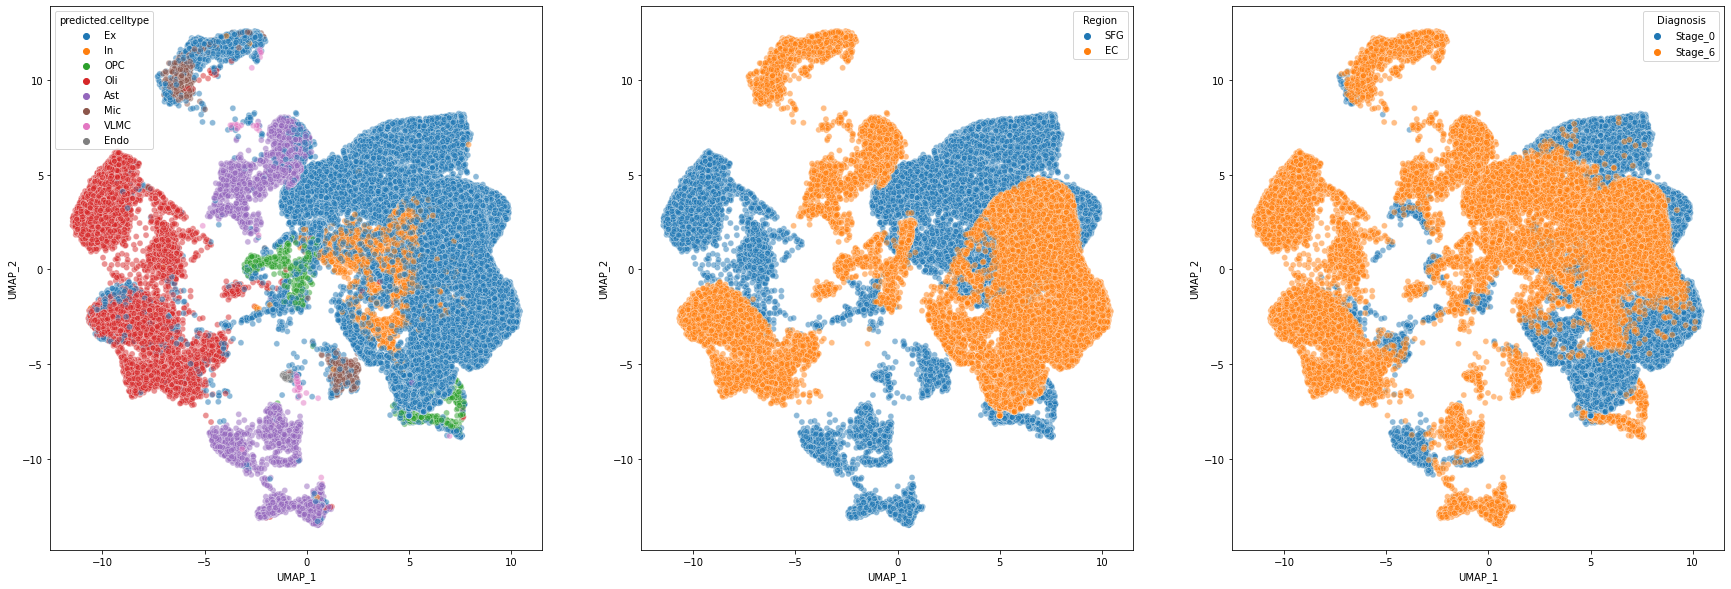

In [199]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sn
cell_umap=umap_org.copy()
cell_umap=cell_umap.loc[cell_umap['Diagnosis']!='Stage_2',:]
fig,axs=plt.subplots(1,3,figsize=[30,10])
sn.scatterplot(cell_umap,x='UMAP_1',y='UMAP_2',hue='predicted.celltype',ax=axs[0],alpha=0.5)
sn.scatterplot(cell_umap,x='UMAP_1',y='UMAP_2',hue='Region',ax=axs[1],alpha=0.5)
sn.scatterplot(cell_umap,x='UMAP_1',y='UMAP_2',hue='Diagnosis',ax=axs[2],alpha=0.5)


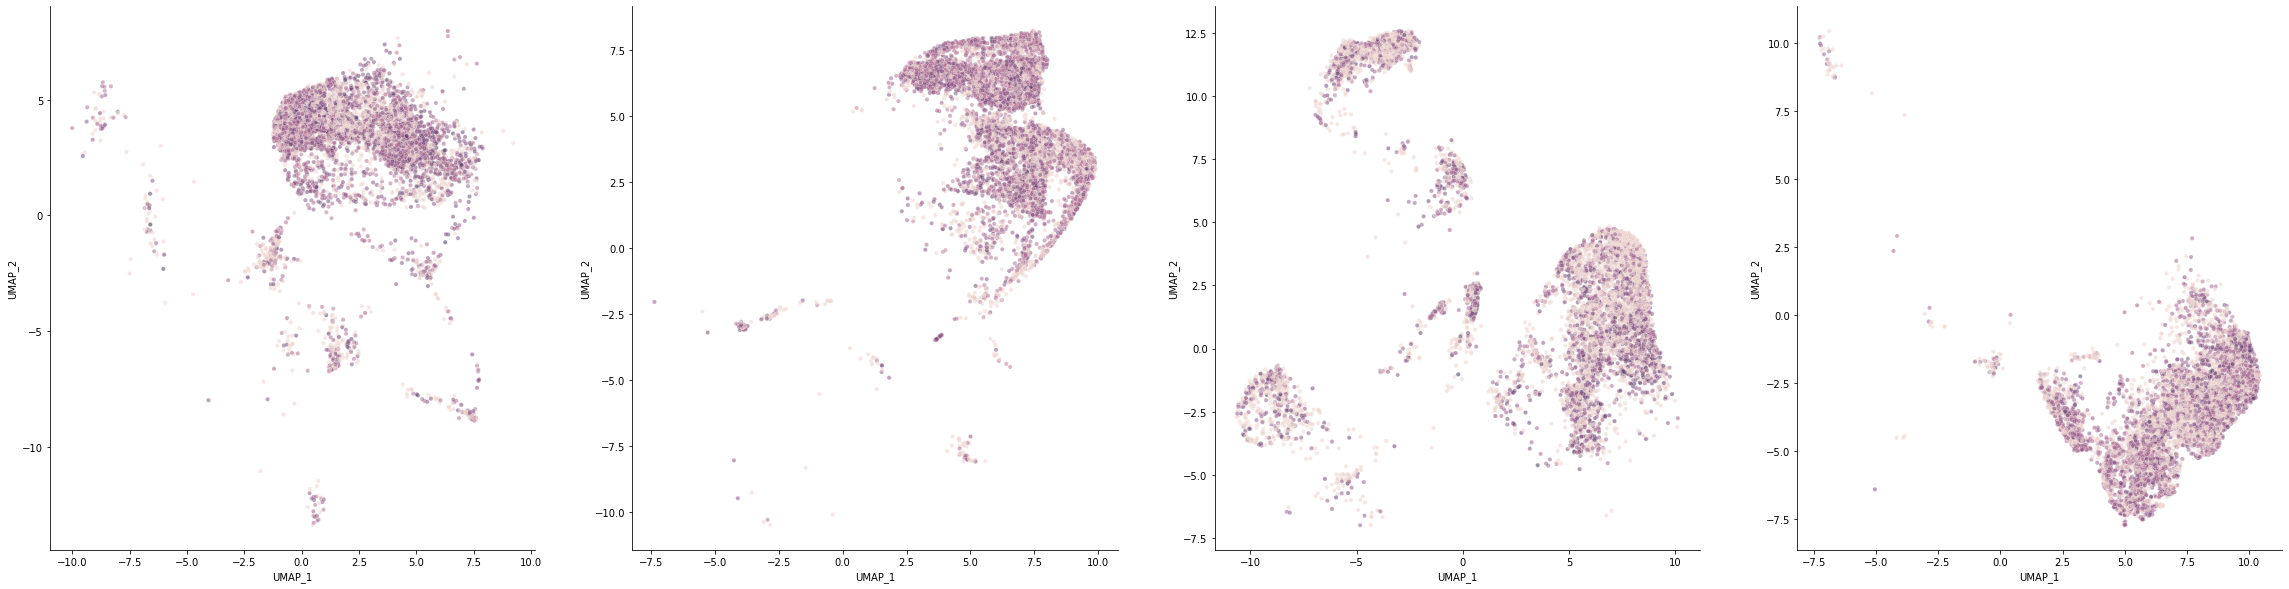

In [258]:
cell='Ex'
te='ERVK'

sub_cell_umap=cell_umap.copy()
sub_cell_umap['RTE']=cell_exp[te]
sub_cell_umap['size']=0.05
sub_cell_umap['RTE']=np.log1p(cell_exp[te])
fig,axs=plt.subplots(1,4,figsize=[40,10])
sn.scatterplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_6'),:],x='UMAP_1',y='UMAP_2',hue='RTE',ax=axs[0],alpha=0.5,size='size',legend=False)
sn.scatterplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_0'),:],x='UMAP_1',y='UMAP_2',hue='RTE',ax=axs[1],alpha=0.5,size='size',legend=False)
sn.scatterplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_6'),:],x='UMAP_1',y='UMAP_2',hue='RTE',ax=axs[2],alpha=0.5,size='size',legend=False)
sn.scatterplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_0'),:],x='UMAP_1',y='UMAP_2',hue='RTE',ax=axs[3],alpha=0.5,size='size',legend=False)
# axs[0].title.set_text('SFG_Stage_6')
# axs[1].title.set_text('SFG_Stage_0')
# axs[2].title.set_text('EC_Stage_6')
# axs[3].title.set_text('EC_Stage_0')

for i in range(len(axs)):
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
#     axs[i].spines['bottom'].set_visible(False)
#     axs[i].spines['left'].set_visible(False)
#     axs[i].get_xaxis().set_ticks([])
#     axs[i].get_yaxis().set_ticks([])


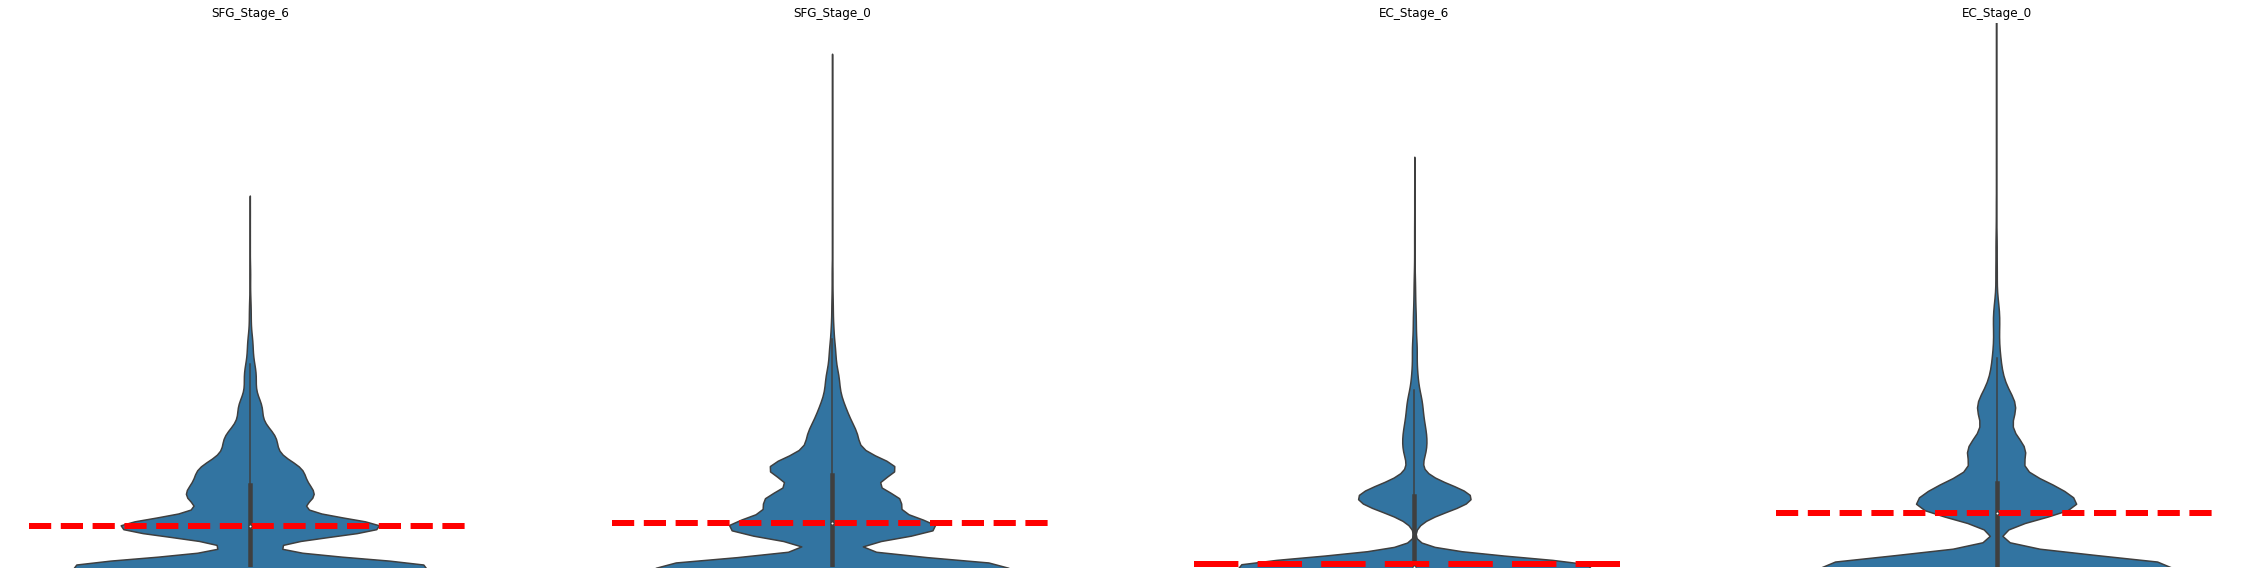

In [263]:
cell='Ex'
te='ERVK'

sub_cell_umap=cell_umap.copy()
sub_cell_umap['RTE']=cell_exp[te]
sub_cell_umap['Group']=sub_cell_umap[['Region','Diagnosis']].agg('/'.join,axis=1)
fig,axs=plt.subplots(1,4,figsize=[40,10])
sn.violinplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_6'),:],y='RTE',hue='RTE',ax=axs[0],alpha=0.5)
sn.violinplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_0'),:],y='RTE',hue='RTE',ax=axs[1],alpha=0.5)
sn.violinplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_6'),:],y='RTE',hue='RTE',ax=axs[2],alpha=0.5)
sn.violinplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_0'),:],y='RTE',hue='RTE',ax=axs[3],alpha=0.5)

mean=np.median(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_6'),'RTE'])
axs[0].plot([-0.5,0.5],[mean,mean],lw=6,color='red',linestyle='dashed')
mean=np.median(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_0'),'RTE'])
axs[1].plot([-0.5,0.5],[mean,mean],lw=6,color='red',linestyle='dashed')
mean=np.median(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_6'),'RTE'])
axs[2].plot([-0.5,0.5],[mean,mean],lw=12,color='red',linestyle='dashed')
mean=np.median(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_0'),'RTE'])
axs[3].plot([-0.5,0.5],[mean,mean],lw=6,color='red',linestyle='dashed')

axs[0].title.set_text('SFG_Stage_6')
axs[1].title.set_text('SFG_Stage_0')
axs[2].title.set_text('EC_Stage_6')
axs[3].title.set_text('EC_Stage_0')
for i in range(len(axs)):
    axs[i].set_ylim([0,80])
    axs[i].axis('off')
#     axs[i].spines['top'].set_visible(False)
#     axs[i].spines['right'].set_visible(False)
#     axs[i].spines['bottom'].set_visible(False)
#     axs[i].spines['left'].set_visible(False)
#     axs[i].get_xaxis().set_ticks([])
#     axs[i].get_yaxis().set_ticks([])

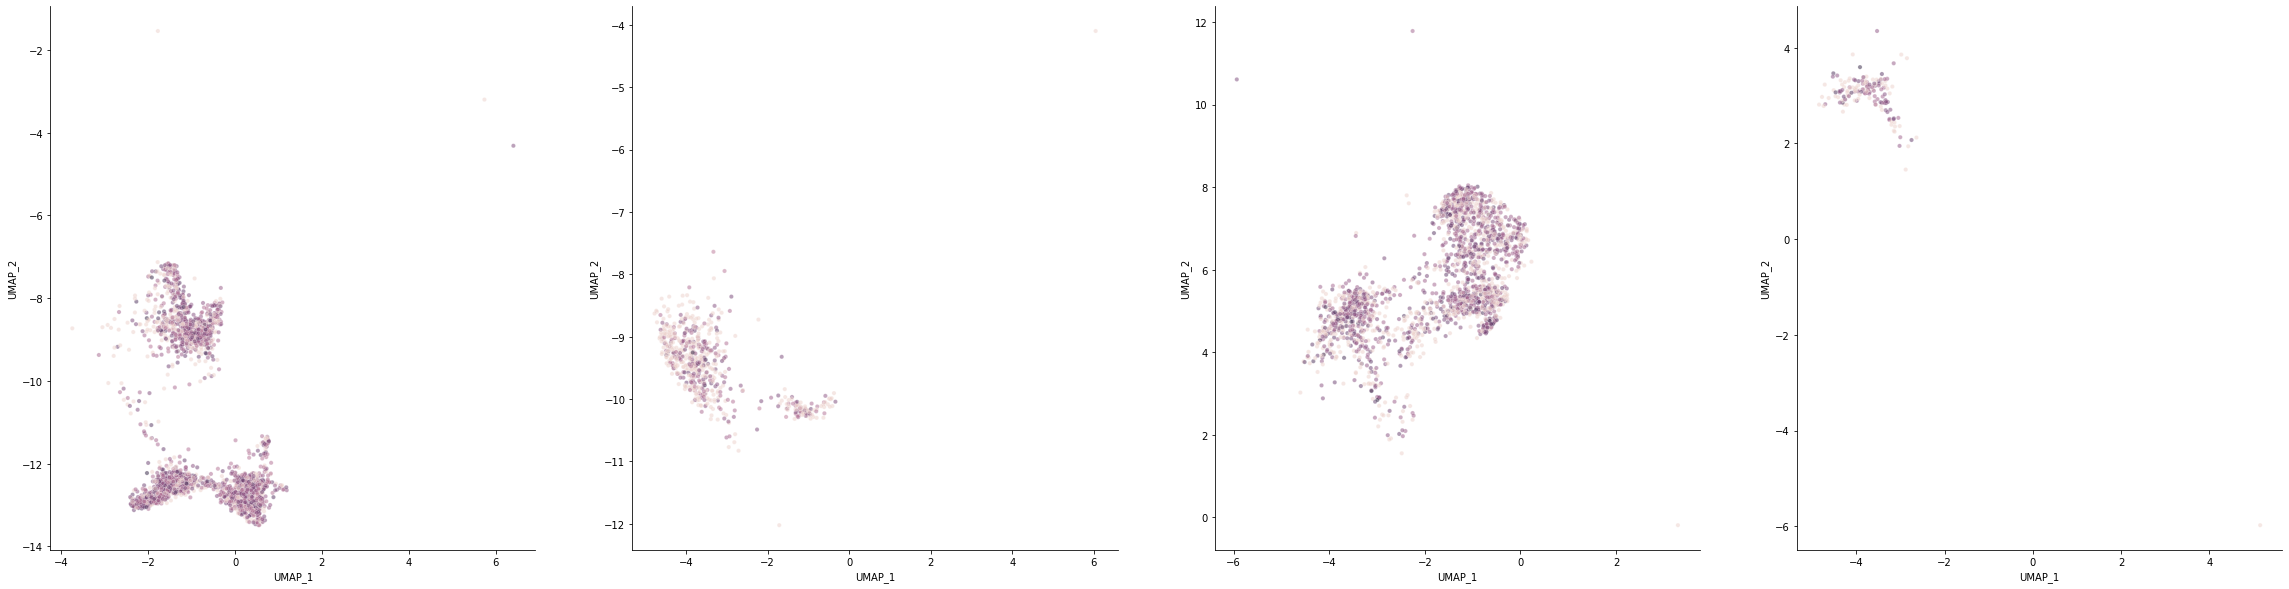

In [259]:
cell='Ast'
te='ERVK'

sub_cell_umap=cell_umap.copy()
sub_cell_umap['Normalized counts']=cell_exp[te]
sub_cell_umap['Normalized counts']=np.log1p(cell_exp[te])
sub_cell_umap['size']=0.05
fig,axs=plt.subplots(1,4,figsize=[40,10])
sn.scatterplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_6'),:],x='UMAP_1',y='UMAP_2',hue='Normalized counts',ax=axs[0],alpha=0.5,size='size',legend=False)
sn.scatterplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_0'),:],x='UMAP_1',y='UMAP_2',hue='Normalized counts',ax=axs[1],alpha=0.5,size='size',legend=False)
sn.scatterplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_6'),:],x='UMAP_1',y='UMAP_2',hue='Normalized counts',ax=axs[2],alpha=0.5,size='size',legend=False)
sn.scatterplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_0'),:],x='UMAP_1',y='UMAP_2',hue='Normalized counts',ax=axs[3],alpha=0.5,size='size',legend=False)
# axs[0].title.set_text('SFG_Stage_6')
# axs[1].title.set_text('SFG_Stage_0')
# axs[2].title.set_text('EC_Stage_6')
# axs[3].title.set_text('EC_Stage_0')

for i in range(len(axs)):
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

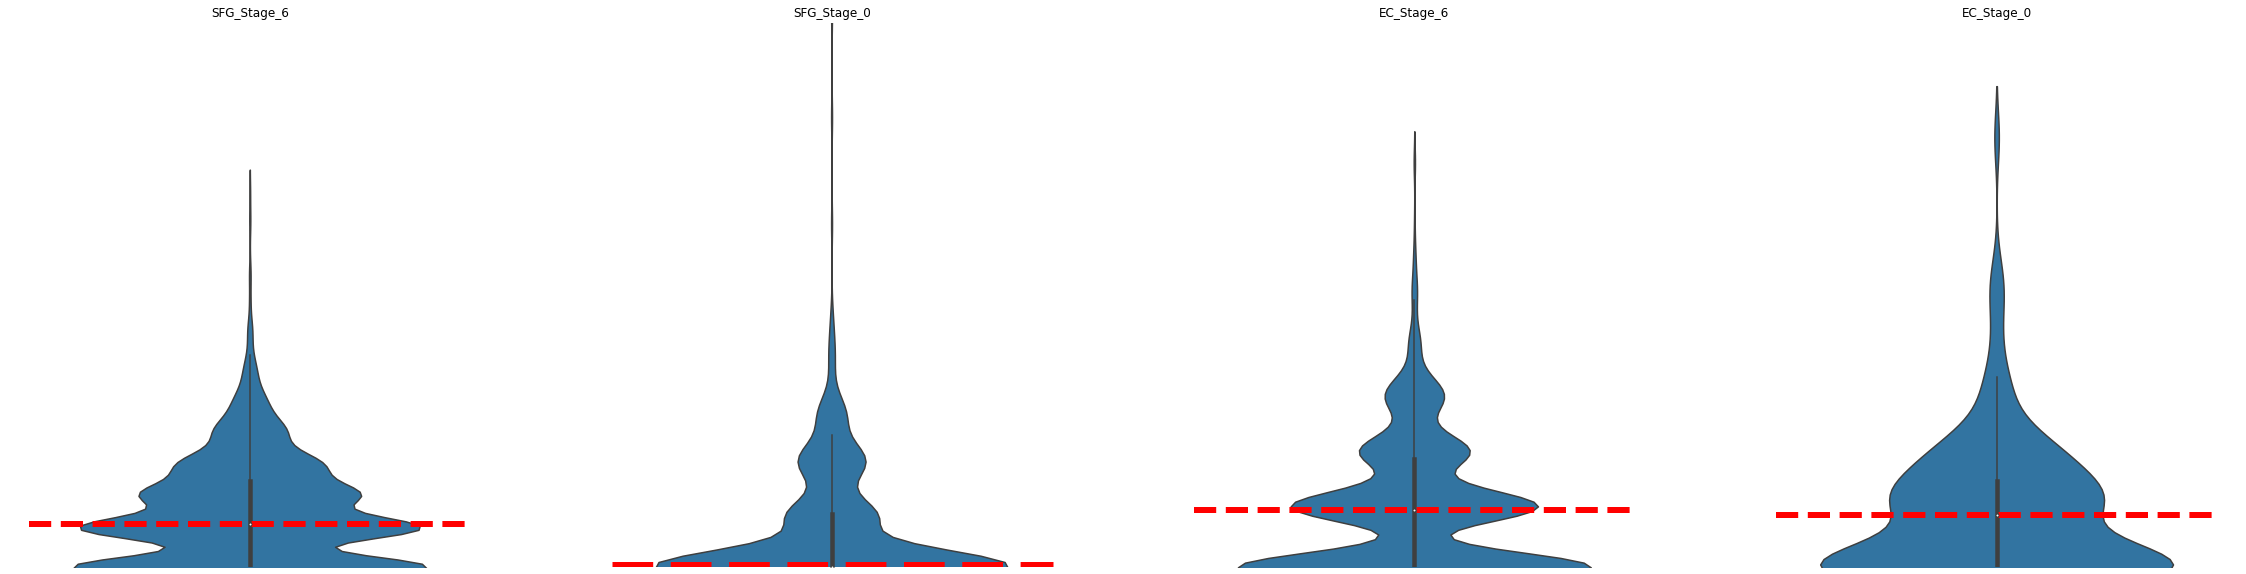

In [265]:
cell='Ast'
te='ERVK'

sub_cell_umap=cell_umap.copy()
sub_cell_umap['Normalized counts']=cell_exp[te]
sub_cell_umap['Group']=sub_cell_umap[['Region','Diagnosis']].agg('/'.join,axis=1)
fig,axs=plt.subplots(1,4,figsize=[40,10])
sn.violinplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_6'),:],y='Normalized counts',hue='Normalized counts',ax=axs[0],alpha=0.5)
sn.violinplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_0'),:],y='Normalized counts',hue='Normalized counts',ax=axs[1],alpha=0.5)
sn.violinplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_6'),:],y='Normalized counts',hue='Normalized counts',ax=axs[2],alpha=0.5)
sn.violinplot(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_0'),:],y='Normalized counts',hue='Normalized counts',ax=axs[3],alpha=0.5)

mean=np.median(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_6'),'Normalized counts'])
axs[0].plot([-0.5,0.5],[mean,mean],lw=6,color='red',linestyle='dashed')
mean=np.median(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='SFG'))&(sub_cell_umap['Diagnosis']=='Stage_0'),'Normalized counts'])
axs[1].plot([-0.5,0.5],[mean,mean],lw=11,color='red',linestyle='dashed')
mean=np.median(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_6'),'Normalized counts'])
axs[2].plot([-0.5,0.5],[mean,mean],lw=6,color='red',linestyle='dashed')
mean=np.median(sub_cell_umap.loc[((sub_cell_umap['predicted.celltype']==cell) & (sub_cell_umap['Region']=='EC'))&(sub_cell_umap['Diagnosis']=='Stage_0'),'Normalized counts'])
axs[3].plot([-0.5,0.5],[mean,mean],lw=6,color='red',linestyle='dashed')

axs[0].title.set_text('SFG_Stage_6')
axs[1].title.set_text('SFG_Stage_0')
axs[2].title.set_text('EC_Stage_6')
axs[3].title.set_text('EC_Stage_0')
for i in range(len(axs)):
    axs[i].set_ylim([0,80])
    axs[i].axis('off')

In [260]:
cell_exp.head()

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A2ML1.AS1,A2ML1.AS2,A2MP1,A4GALT,...,YTHDF2P1,YWHAEP1,ZIM3,ZNF736P9Y,ZNF750,ZSCAN4,L1s,ERVK,Alus,AllTE
SRR11422700_AAAAAACTCCAACCAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1545.741325,10.515247,2986.330179,5751.840168
SRR11422700_AAAACAACAATGGAAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1553.896407,9.332711,2645.823612,5380.307979
SRR11422700_AAAACTCAGACAAAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1557.251908,10.178117,2880.407125,5638.676845
SRR11422700_AAAACTCAGCGTTTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1551.528879,0.000000,2763.306908,5520.951302
SRR11422700_AAAACTCTCCAAACAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1256.281407,0.000000,1849.246231,4020.100503


In [330]:
import statsmodels.api as sm

In [301]:
cor_exp_table=cell_exp.copy()
cor_exp_table.drop(['ERVK'],inplace=True,axis=1)
cor_exp_table=cor_exp_table.loc[:,cor_exp_table.sum(axis=0)>0.1*len(cor_exp_table)]

ervk=cell_exp['ERVK']
result=[] # gene, cor, pvalue
for gene in cor_exp_table.columns:
    if gene in rte:
        continue
    cor=scipy.stats.pearsonr(cor_exp_table[gene], ervk)
    result.append([gene,cor[0],cor[1]])
cor_table=pd.DataFrame(result,columns=['Gene','Corr','Pvalue'])
cor_table=cor_table.loc[[x in protein_coding for x in cor_table['Gene']  ],:]
cor_table.sort_values(by='Pvalue',ascending=True,axis=0,inplace=True)
cor_table.head()

1000
2000
3000
4000
5000
6000
7000


In [339]:
cor_table['Qvalue']=sm.stats.multipletests(cor_table['Pvalue'])[1]

In [349]:
cor_table['Qvalue'].describe()

count    7.581000e+03
mean     3.772381e-01
std      4.498858e-01
min      6.178774e-49
25%      1.372074e-05
50%      3.439193e-02
75%      9.993671e-01
max      1.000000e+00
Name: Qvalue, dtype: float64